<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/Dota_2_Competitive_Picks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dota 2 Competitive Picks

All Hero Picks in the pro scene (Patch 7.33e)

https://www.kaggle.com/datasets/nihalbarua/dota2-competitive-picks/



Also see its sister dataset for public matches.
I wanted to create a dataset for the most used heroes in ESL Dreamleague season 20 (2023-06), and came across the OpenDota API which helped me create this dataset. https://liquipedia.net/dota2/DreamLeague/Season_20
The data is given as follows :-

•	Name : Name of the hero

•	Primary Attribute : str stands for Strength, agi stands for Agility, int stands for Intelligence, and all stands for Universal. (Universal heroes don't have a Primary Attribute, but get 0.7 damage per point of each attribute)

•	Attack Type : Heroes have either Melee or Ranged Attack type.

•	Attack Range : Almost all Melee heroes have a base attack range of 150, with some outliers. Some items (ie. Broom Handle, Dragon Lance) also exist which increase attack range, but we are not considering those here.

•	Roles : Each hero fulfils a specific role in their team. Normally, a team has 3 Cores(Carry) and 2 Supports. There are also subroles such as Disabler, Pusher, Durable, Initiator, Nuker or Escape which further dictate the playstyle that can be expected from the hero. A good balance of subroles leads to a balanced draft.

•	Total Pro Wins : Number of times the hero was successfully drafted and is part of winning team

•	Times Picked : Number of times the hero was successfully drafted into either team

•	Times Banned : Number of times hero was banned from draft

•	Win Rate : Percentage of games won on successful draft

•	Niche Hero : A hero qualifies as "niche" when it has a low ban rate, low pick rate and a low to moderate (45%-55%) win rate.

o	Heroes can be niche for a variety of reasons; they can be used to counter other picks, player mastery, team composition, pocket strategies, or may not be in the current meta


набор данных для наиболее часто используемых героев 20-го сезона ESL Dreamleague  на API OpenDota

Данные представлены следующим образом: -

•	Name : Имя героя

•	Primary Attribute : str означает силу, agi означает ловкость, int означает интеллект и all означает универсальность. (У универсальных героев нет основного Атрибута, но они получают 0,7 урона за очко каждого атрибута)

•	Attack Type : Герои имеют тип атаки ближнего или дальнего боя.

•	Attack Range : Почти все герои ближнего боя имеют базовую дальность атаки 150, с некоторыми отклонениями. Также существуют некоторые предметы (например, ручка метлы, копье дракона), которые увеличивают дальность атаки, но мы не рассматриваем их здесь.

•	Roles : Каждый герой выполняет определенную роль в своей команде. Обычно в команде есть 3 ядра (керри) и 2 поддержки. Существуют также дополнительные роли, такие как Disabler, Pusher, Durable, Initiator, Nuker или Escape, которые дополнительно определяют стиль игры, которого можно ожидать от героя. Хороший баланс подролей приводит к сбалансированному драфту.

•	Total Pro Wins : сколько раз герой был успешно выбран и стал частью команды-победителя.

•	Times Picked : количество раз, когда герой был успешно выбран в любую команду.

•	Times Banned : сколько раз героя забанили на драфте.

•	Win Rate : процент игр, выигранных при успешном драфте.

•	Niche Hero : герой считается «нишевым», если у него низкий процент банов, низкий процент выбора и низкий или средний (45–55%) процент побед.

Герои могут быть нишевыми по разным причинам; они могут использоваться для противодействия другим выборам, мастерству игрока, составу команды, карманным стратегиям или могут отсутствовать в текущей мете.


можно рассмотреть также Herald -> Guardian -> Crusader -> Archon -> Legend -> Ancient -> Divine -> Immortal https://www.kaggle.com/datasets/nihalbarua/dota2-hero-preference-by-mmr

# импорт

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# kaggle

https://www.kaggle.com/code/scarfsman/dota-2-competitive-picks-eda

In [2]:
import matplotlib.patheffects as pe
import textwrap
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/Dota2Competitive%20PicksCurrent_Pro_meta.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
roles = list(df['Roles'])
rolelist = [i.split(',') for i in roles]
for n, i in enumerate(rolelist):
    rolelist[n]= [q.strip(' ') for q in i]
df['Roles'] = rolelist
df.sort_values('Win Rate', ascending = False).head()

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
59,Meepo,agi,Melee,150,"[Carry, Escape, Nuker, Disabler, Initiator, Pu...",4,5,49,80.00,False
16,Chen,all,Ranged,650,"[Support, Pusher]",22,36,173,61.11,False
3,Anti-Mage,agi,Melee,150,"[Carry, Escape, Nuker]",40,66,78,60.61,False
81,Queen of Pain,int,Ranged,550,"[Carry, Nuker, Escape]",145,240,414,60.42,False
65,Nature's Prophet,int,Ranged,620,"[Carry, Pusher, Escape, Nuker]",245,412,946,59.47,False


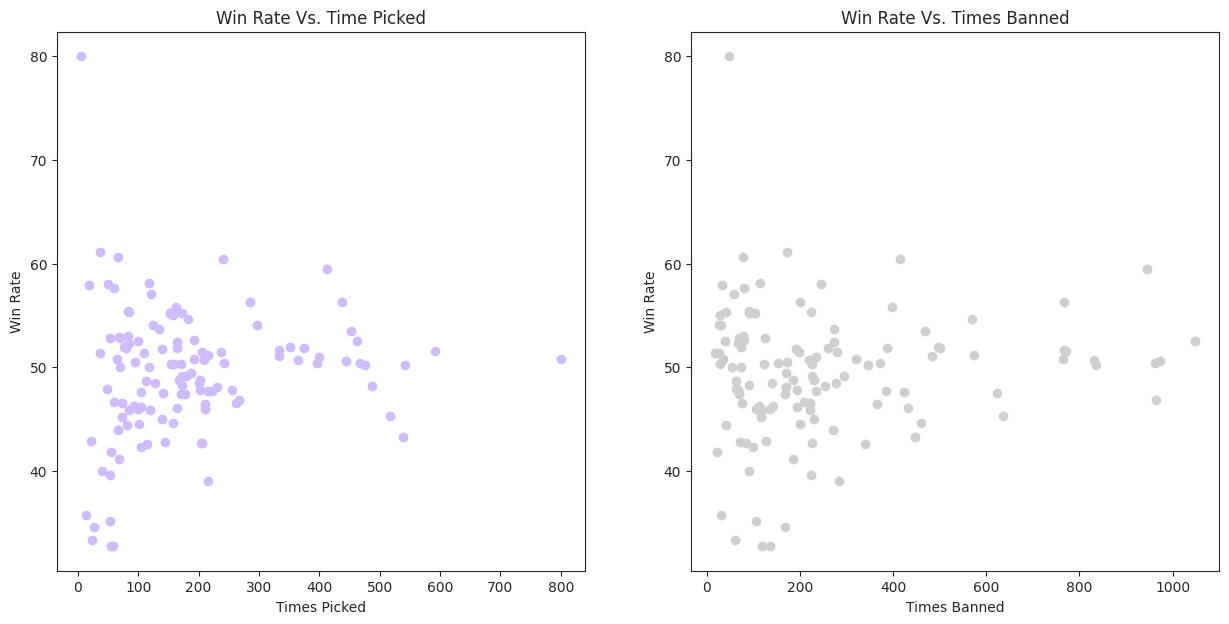

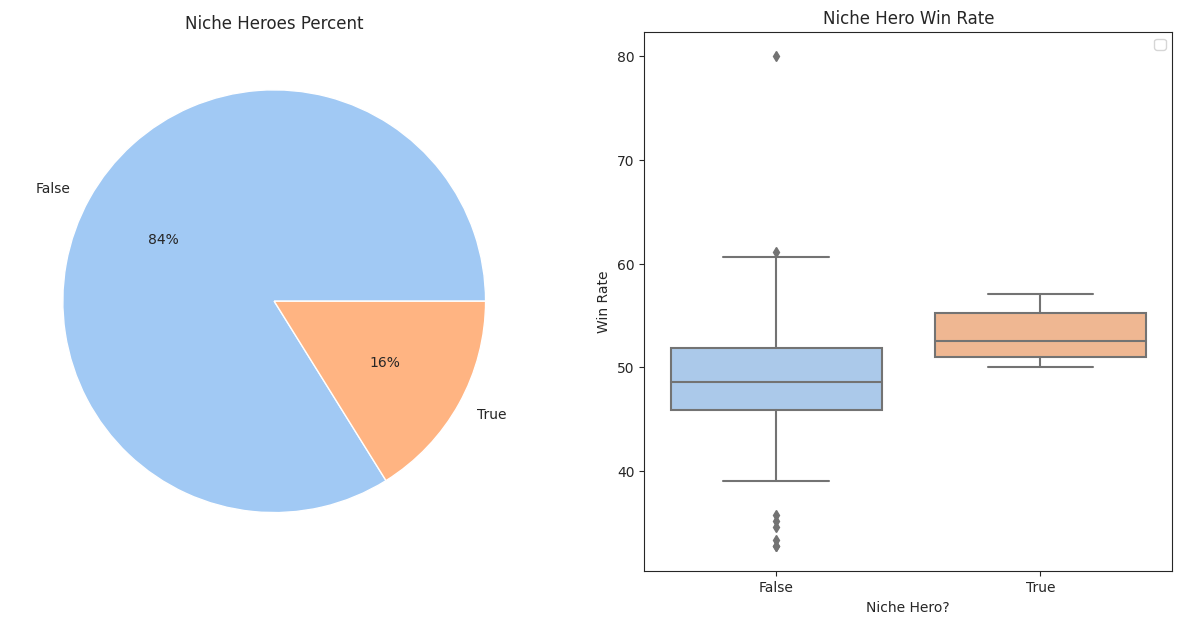

In [3]:
sns.set_style('ticks')
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].scatter(data = df, x = 'Times Picked',  y = 'Win Rate', color = colors[4])
ax[0].set_xlabel('Times Picked')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate Vs. Time Picked')

ax[1].scatter(data = df, x = 'Times Banned',  y = 'Win Rate', color = colors[7])
ax[1].set_xlabel('Times Banned')
ax[1].set_ylabel('Win Rate')
ax[1].set_title('Win Rate Vs. Times Banned')
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].pie(x = df['Niche Hero?'].value_counts(),
          labels = df['Niche Hero?'].value_counts().index,
          colors = colors,
          autopct='%.0f%%')
ax[0].set_title('Niche Heroes Percent')
sns.boxplot(data = df, x = 'Niche Hero?', y = 'Win Rate', palette = colors)
ax[1].set_title('Niche Hero Win Rate')
plt.legend()
plt.show()

Analysis
We can drop the unnamed column that appears to be a duplicate of the index.
I have split the roles out into a list to make analysis easier down the line
There seems to be a weak correlation between Win Rate, and the time picked and times banned features, but falls apart for heroes with lower pick rates.
Niche Heroes represent around a quarter of all heroes in the game, and as a group have a slightly higher median win rate than heroes that are picked at a reasonable rate.
Heroes appear to largely be banned and picked appropriately, i.e. the winningest heroes are taken and banned more often.

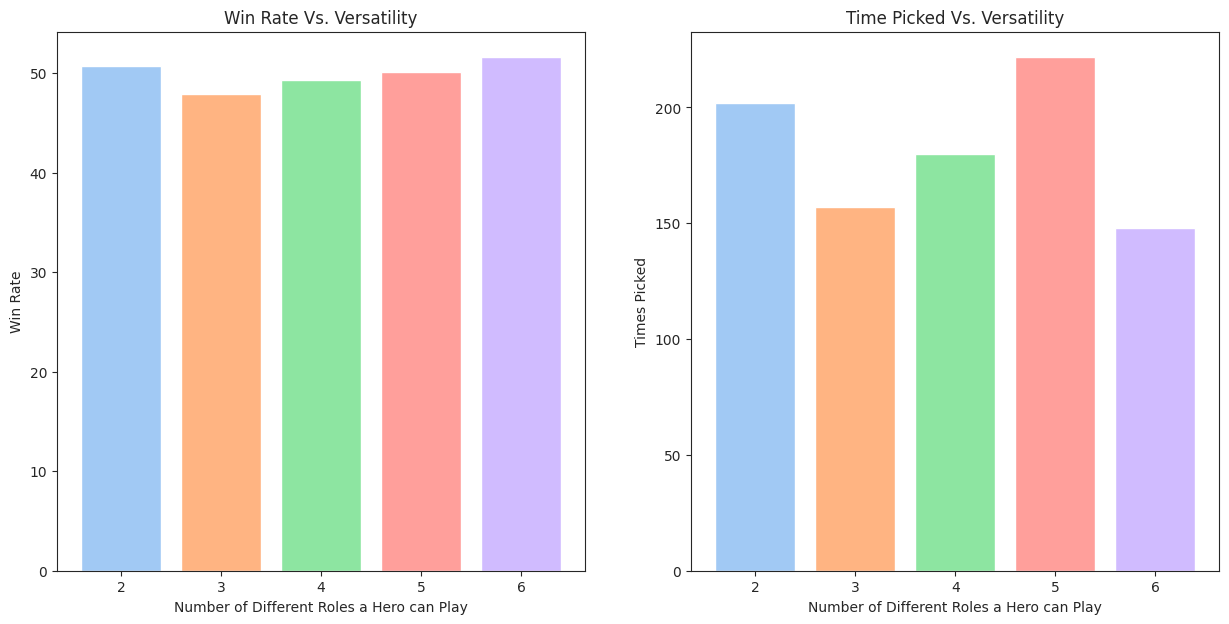

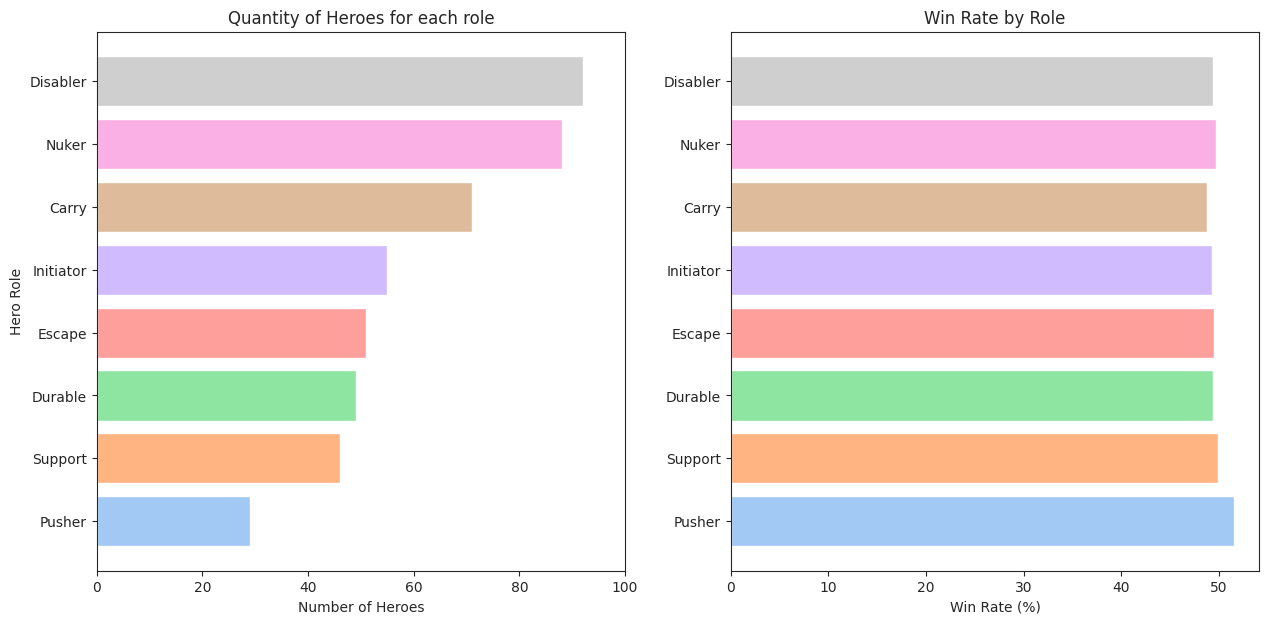

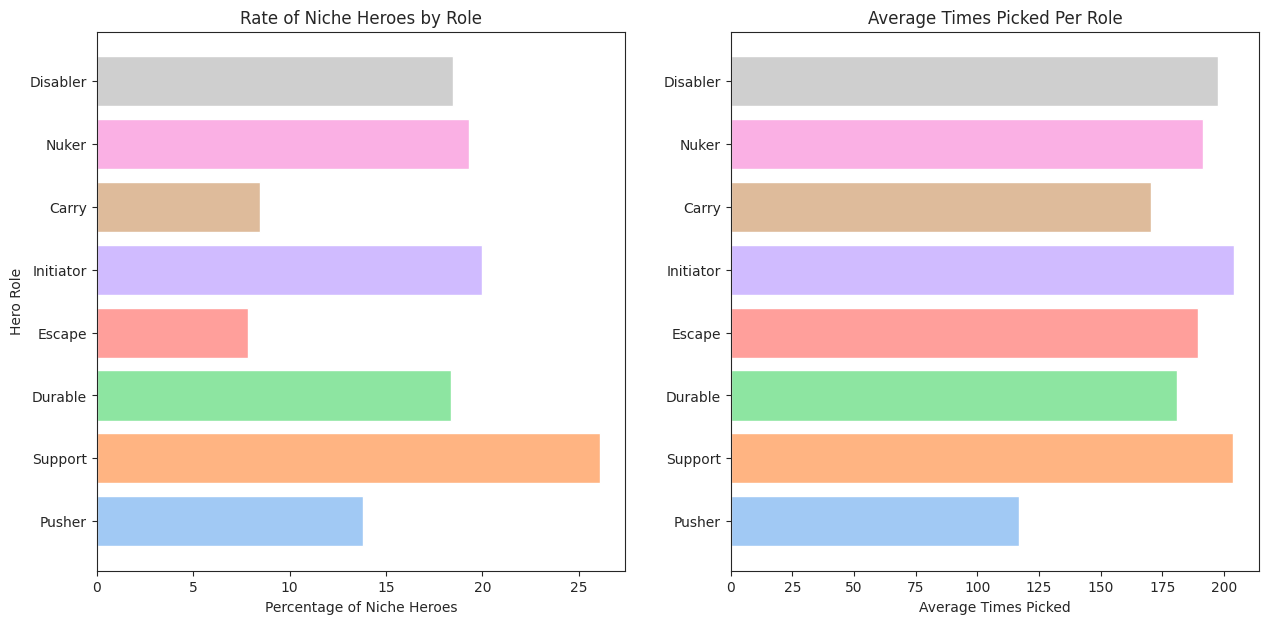

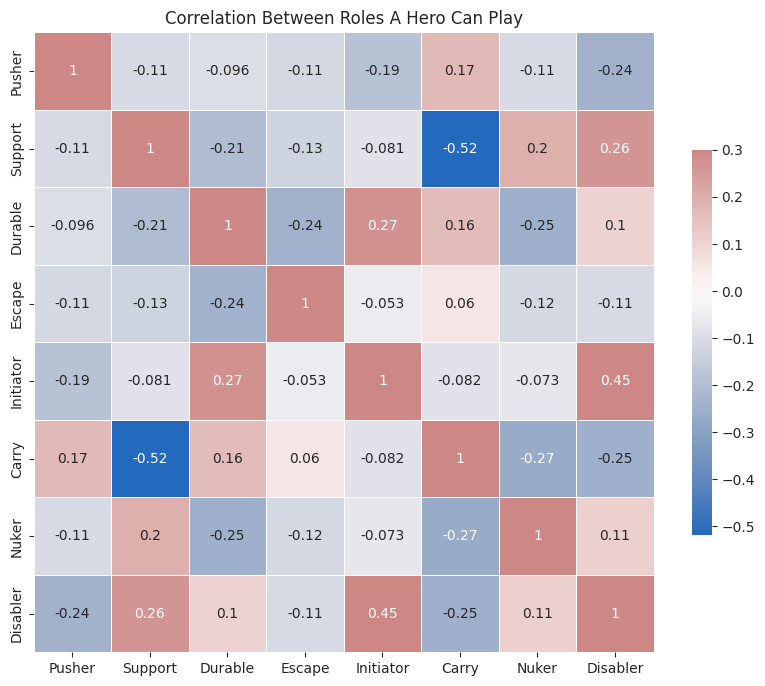

In [4]:
from collections import defaultdict

df['Versatility'] = [len(i) for i in list(df['Roles'])]
bar_df = df[['Win Rate', 'Versatility', 'Times Picked']].groupby('Versatility').mean()

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].bar(x = bar_df.index, height = bar_df['Win Rate'], color = colors)
ax[0].set_xlabel('Number of Different Roles a Hero can Play')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate Vs. Versatility')

ax[1].bar(x = bar_df.index, height = bar_df['Times Picked'], color = colors)
ax[1].set_xlabel('Number of Different Roles a Hero can Play')
ax[1].set_ylabel('Times Picked')
ax[1].set_title('Time Picked Vs. Versatility')
plt.show()

roles = list(df['Roles'])
roleNums = defaultdict(int)
for i in roles:
    for role in i:
        roleNums[role] += 1
roleNums = dict(sorted(roleNums.items(), key=lambda item: item[1]))
keys = []
items = []
winrate = []
niche = []
picks = []
for key, item in roleNums.items():
    keys.append(key)
    items.append(item)
    filt = []
    for i in range(df.shape[0]):
        filt.append(key in df['Roles'].iloc[i])
    winrate.append(df[filt]['Win Rate'].mean())
    niche.append(df[filt]['Niche Hero?'].sum())
    picks.append(df[filt]['Times Picked'].mean())
    df[key] = filt

niche = [(niche[i]/items[i])*100 for i in range(len(niche))]
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(keys, items, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Heroes')
ax[0].set_xlim(0, 100)
ax[0].set_title('Quantity of Heroes for each role')
ax[1].barh(keys, winrate, color = colors)
ax[1].set_xlabel('Win Rate (%)')
ax[1].set_title('Win Rate by Role')
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(keys, niche, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Percentage of Niche Heroes')
ax[0].set_title('Rate of Niche Heroes by Role')

ax[1].barh(keys, picks, color = colors)
ax[1].set_title('Average Times Picked Per Role')
ax[1].set_xlabel('Average Times Picked')
plt.show()

fig, ax = plt.subplots(figsize = (10,10))
corr = df[keys].corr()
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Between Roles A Hero Can Play')
plt.show()

Analysis
We have created the versatility feature, which shows the total number of roles a given hero can play
Win rates seem fairly consistent regardless of versatility, but pick rates seem to fall noticeably. Could potentially versatile heroes lack raw power?
There is a clear design philosophy for heroes, with pushers being designed the least and disablers being designed the most.
Despite this, win rates seem fairly consistent across all roles.
Support heroes seem to have a disproportionately high number of niche characters.
Escape characters are picked disproportionately often, given the low amount of heroes designed to play the role.
Our Correlation plot shows low levels of correlation between the roles a given hero can play. The notable exceptions are the Disabler and Infiltrator roles, which are more likely to appear together, and the Support and Carry Roles, which are more likely to not.

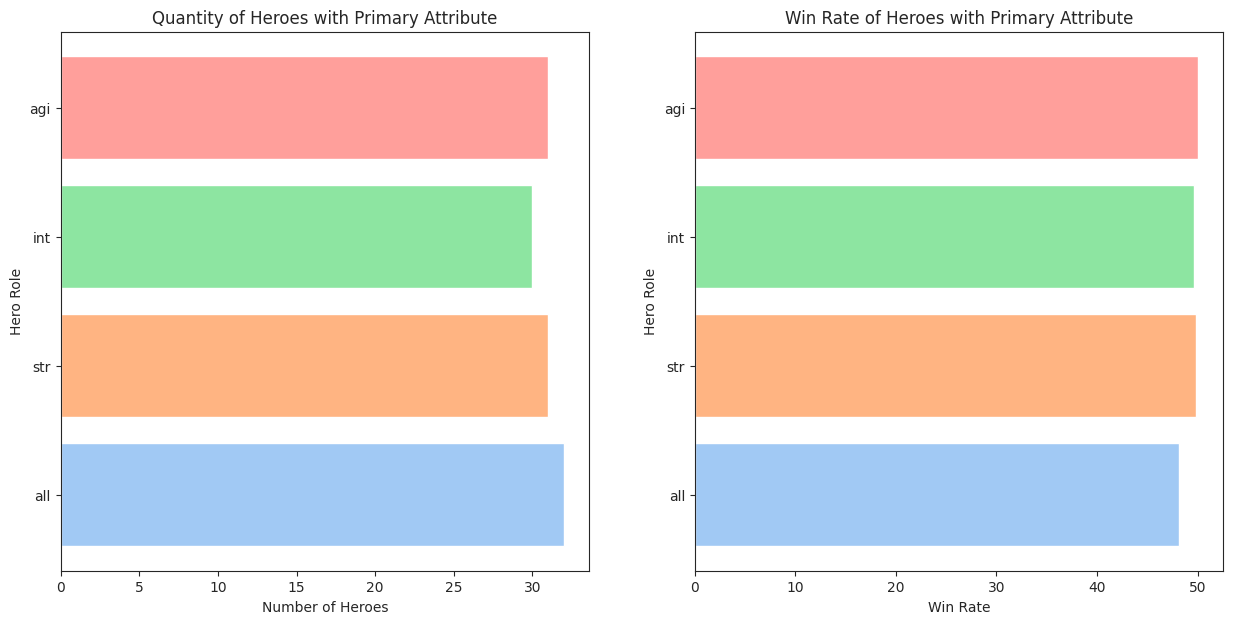

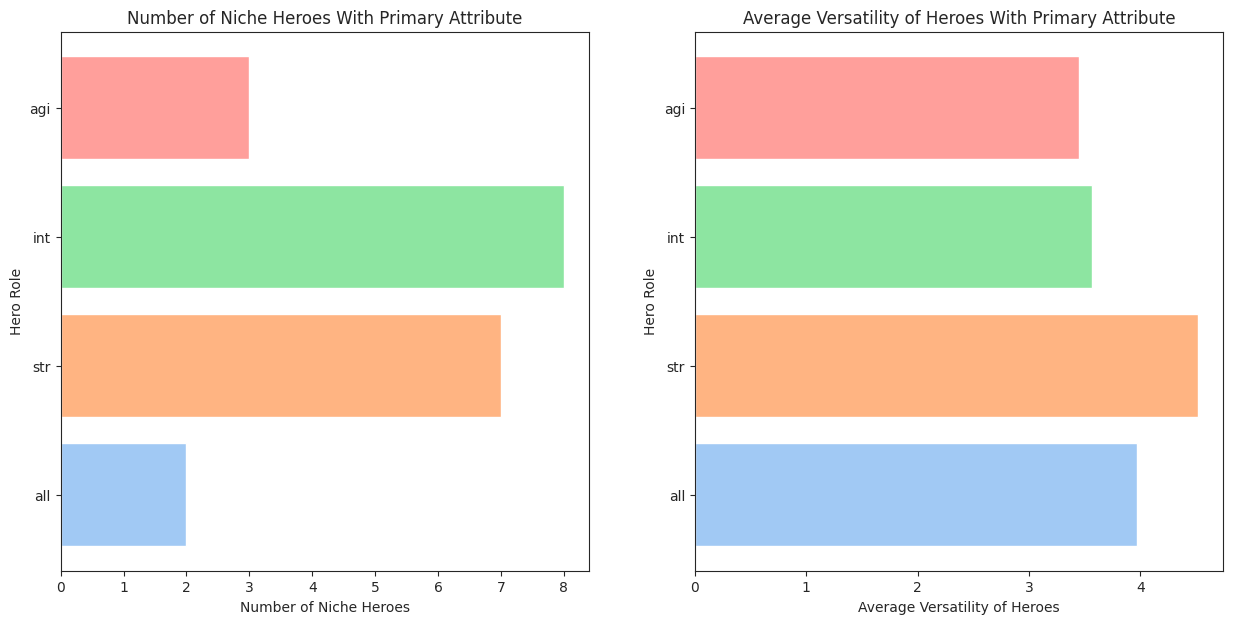

In [5]:
from collections import Counter

attributes = df['Primary Attribute']
attributes = Counter(attributes)

counts = []
winrate = []
niche = []
verst = []

for i in list(attributes.keys()):
    filt = (df['Primary Attribute'] == i)
    winrate.append(df[filt]['Win Rate'].mean())
    niche.append(df[filt]['Niche Hero?'].sum())
    verst.append(df[filt]['Versatility'].mean())
    counts.append(attributes[i])

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(list(attributes.keys()), counts, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Heroes')
ax[0].set_title('Quantity of Heroes with Primary Attribute')
ax[1].barh(list(attributes.keys()), winrate, color = colors)
ax[1].set_ylabel('Hero Role')
ax[1].set_xlabel('Win Rate')
ax[1].set_title('Win Rate of Heroes with Primary Attribute')

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(list(attributes.keys()), niche, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Niche Heroes')
ax[0].set_title('Number of Niche Heroes With Primary Attribute')
ax[1].barh(list(attributes.keys()), verst, color = colors)
ax[1].set_ylabel('Hero Role')
ax[1].set_xlabel('Average Versatility of Heroes')
ax[1].set_title('Average Versatility of Heroes With Primary Attribute')
plt.show()

Analysis
The number of heroes with a given primary attribute is evely distributed across all four attributes in the dataset. Interesting to note.
Win rate is fairly evenly spread across all attributes
int and str heroes account for the majority of niche picks, as they are represented at a significantly higher level than the other two attributes.
Average Versatility is fairly evenly spread across all four attributes, with agi heroes the lowest and str heroes the highest. Suggests this attribute lends itself to more gameplay mechanics than the other.

https://www.kaggle.com/code/pavelboek/dota-2-picks-eda-polars

In [6]:
import polars as pl

In [7]:
df = pl.read_csv("https://raw.githubusercontent.com/vn322/Sport-University/main/esport/Dota2Competitive%20PicksCurrent_Pro_meta.csv")
df = df.rename({"":"index"})

In [8]:
df.describe()

describe,index,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
str,f64,str,str,str,f64,str,f64,f64,f64,f64,f64
"""count""",124.0,"""124""","""124""","""124""",124.0,"""124""",124.0,124.0,124.0,124.0,124.0
"""null_count""",0.0,"""0""","""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",61.5,null,null,null,350.604839,null,91.975806,183.951613,255.112903,49.390726,0.16129
"""std""",35.939764,null,null,null,200.271759,null,73.328691,143.145492,241.567349,6.317535,0.369291
"""min""",0.0,"""Abaddon""","""agi""","""Melee""",150.0,"""Carry, Disable…",4.0,5.0,18.0,32.73,0.0
"""max""",123.0,"""Zeus""","""str""","""Ranged""",700.0,"""Support, Pushe…",407.0,801.0,1049.0,80.0,1.0
"""median""",61.5,null,null,null,340.0,null,79.0,156.0,185.5,50.25,0.0
"""25%""",31.0,null,null,null,150.0,null,41.0,83.0,80.0,46.24,null
"""75%""",93.0,null,null,null,550.0,null,106.0,216.0,340.0,52.53,null


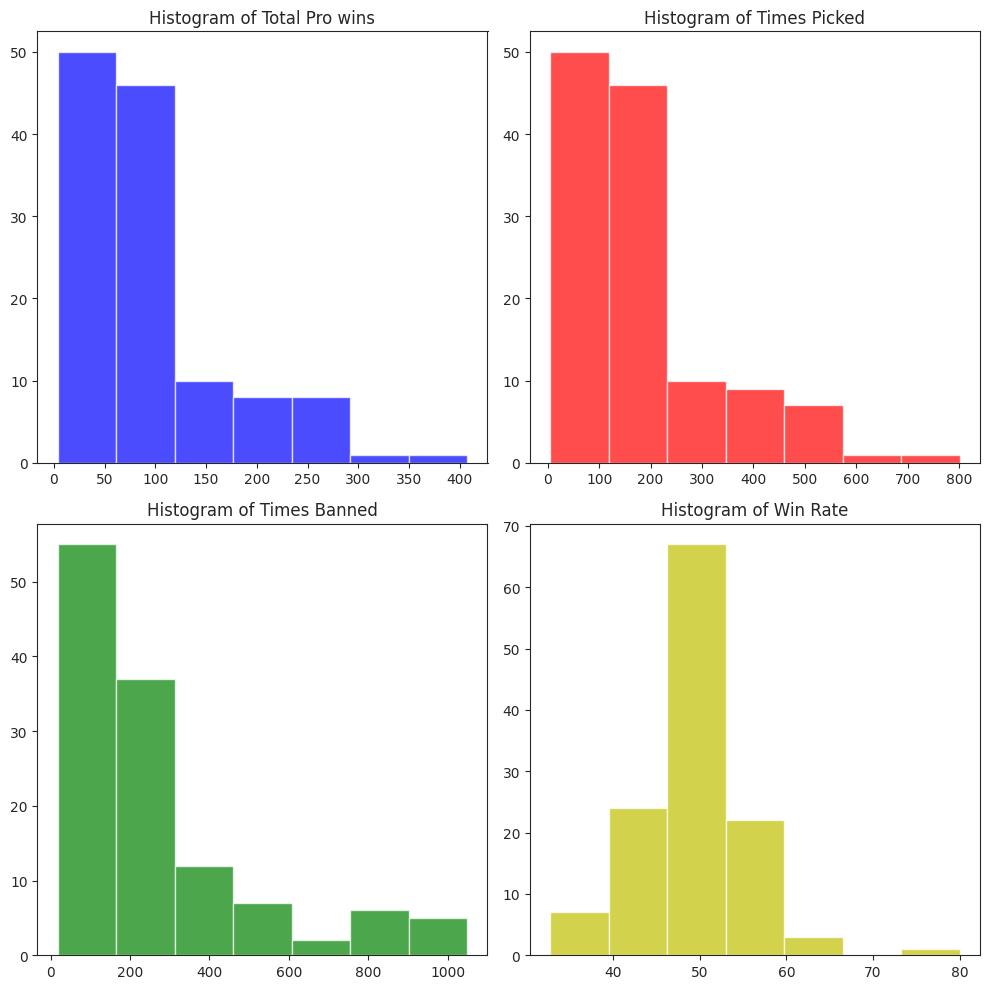

In [9]:
#Let's just look at the distribution of numerical features

columns_of_interest = ["Total Pro wins", "Times Picked", "Times Banned", "Win Rate"]
colors = ['b', 'r', 'g', 'y']


fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()

for i in range(len(columns_of_interest)):
    axs[i].hist(df[columns_of_interest[i]], bins=7, color=colors[i], alpha=0.7)
    axs[i].set_title('Histogram of {}'.format(columns_of_interest[i]))

plt.tight_layout()
plt.show()

In [10]:
#Some data processing to make the dataset nicer to play with
df = df.with_columns(pl.col("Roles").apply(lambda x: x.split(",")))
df = df.with_columns(pl.col("Roles").apply(lambda x: len(x)).alias("Num of roles"))
flattened_df = df.explode("Roles")
flattened_df = flattened_df.with_columns(pl.col("Roles").str.strip())

TBD:

Heroes above average -roles, types, niche heroes

Heroes below average -roles, types, niche heroes

Breakdown of roles

distribution of win/ban/pick rates, primary types, niche heroes

Breakdown of Attack types

distribution of win/ban/pick rates, primary types, niche heroes

Breakdown of primary types

distribution of win/ban/pick rates, roles, niche roles

Breakdown of niche heroes

distribution of win/ban/pick rates, roles, primary attributes

In [11]:
flattened_df.head(3)

index,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?,Num of roles
i64,str,str,str,i64,str,i64,i64,i64,f64,bool,i64
0,"""Abaddon""","""all""","""Melee""",150,"""Support""",8,24,61,33.33,false,3
0,"""Abaddon""","""all""","""Melee""",150,"""Carry""",8,24,61,33.33,false,3
0,"""Abaddon""","""all""","""Melee""",150,"""Durable""",8,24,61,33.33,false,3


In [12]:
flattened_df = flattened_df.with_columns(pl.col("Roles").str.strip())
roles_count = flattened_df.groupby("Roles").count().sort(by="count",descending=True)

In [13]:
roles_count

Roles,count
str,u32
"""Disabler""",92
"""Nuker""",88
"""Carry""",71
"""Initiator""",55
"""Escape""",51
"""Durable""",49
"""Support""",46
"""Pusher""",29


In [14]:
grouped = flattened_df.groupby("Roles")

In [15]:
roles_stats = grouped.agg([
    pl.col("Name").apply(lambda s: len(s.unique())).alias("Unique heroes"),
    pl.col("Total Pro wins").mean().alias("Average Total Pro wins"),
    pl.col("Times Picked").mean().alias("Average Times Picked"),
    pl.col("Times Banned").mean().alias("Times Banned"),
    pl.col("Win Rate").mean().alias("Win Rate")
])

In [16]:
roles_stats

Roles,Unique heroes,Average Total Pro wins,Average Times Picked,Times Banned,Win Rate
str,i64,f64,f64,f64,f64
"""Pusher""",29,60.275862,117.0,208.275862,51.542414
"""Escape""",51,95.843137,189.568627,290.490196,49.487059
"""Support""",46,101.152174,203.891304,210.695652,49.876087
"""Nuker""",88,96.170455,191.693182,252.454545,49.750455
"""Carry""",71,85.169014,170.380282,277.732394,48.813803
"""Disabler""",92,98.152174,197.695652,259.108696,49.361087
"""Durable""",49,91.306122,180.979592,265.061224,49.437551
"""Initiator""",55,101.4,204.145455,263.781818,49.269455


In [17]:
roles_stats_pandas = roles_stats.to_pandas()

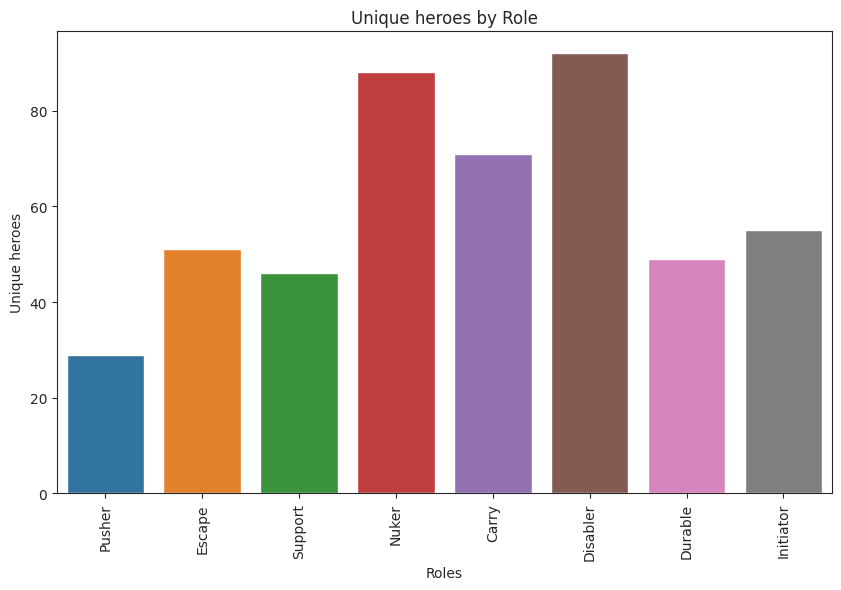

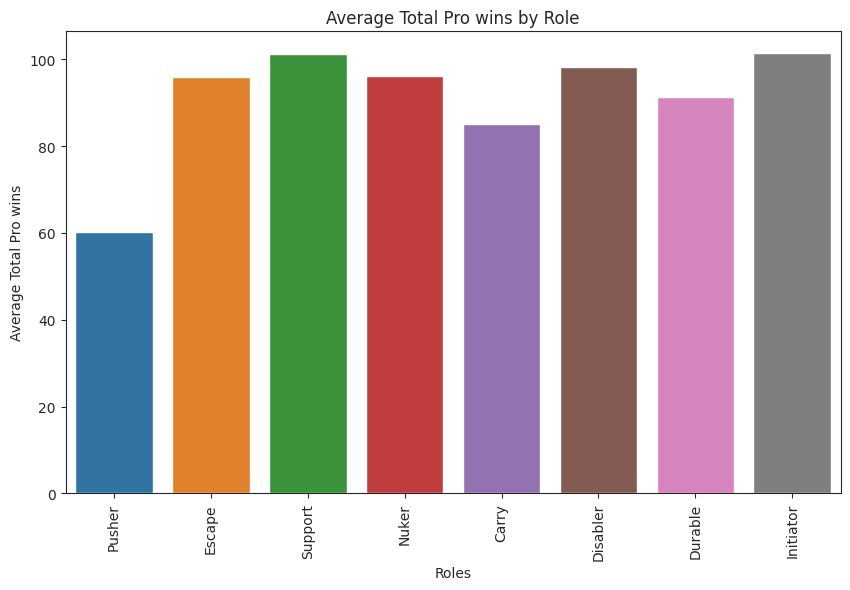

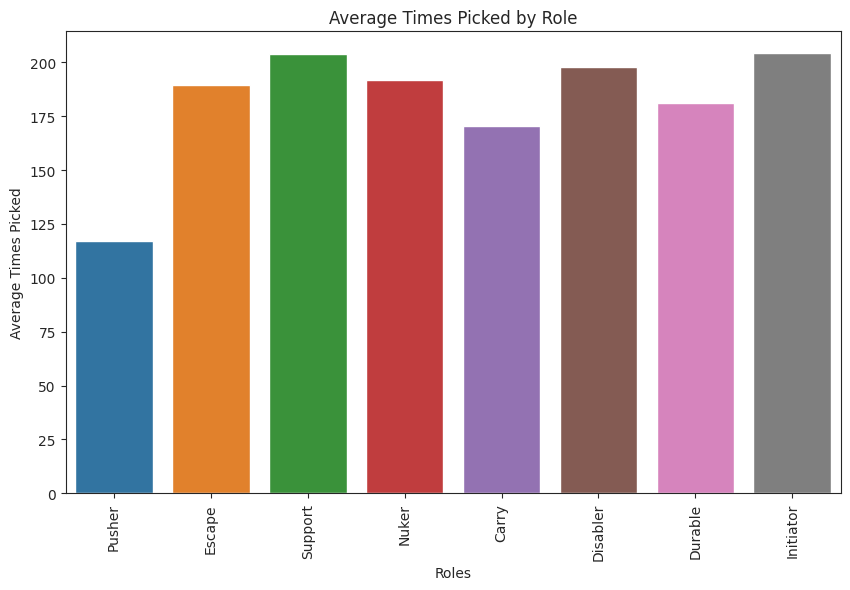

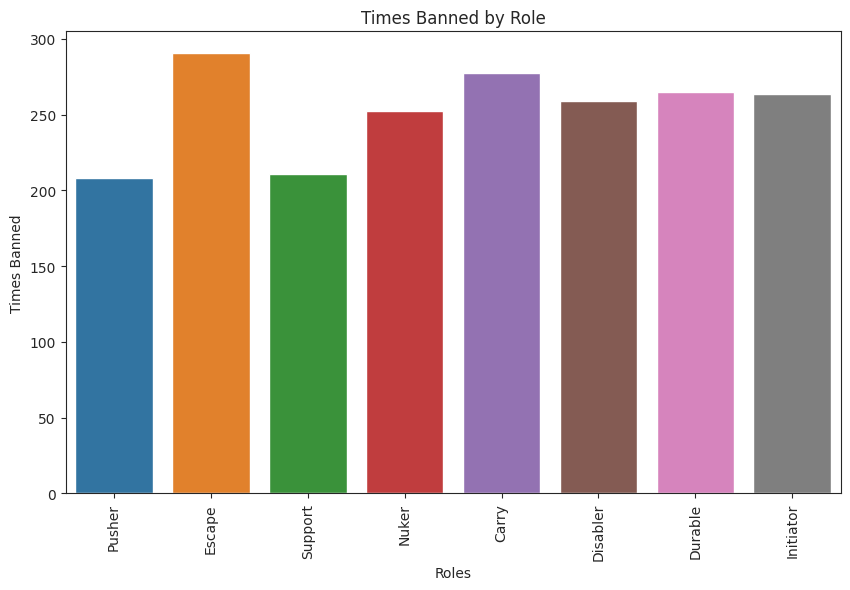

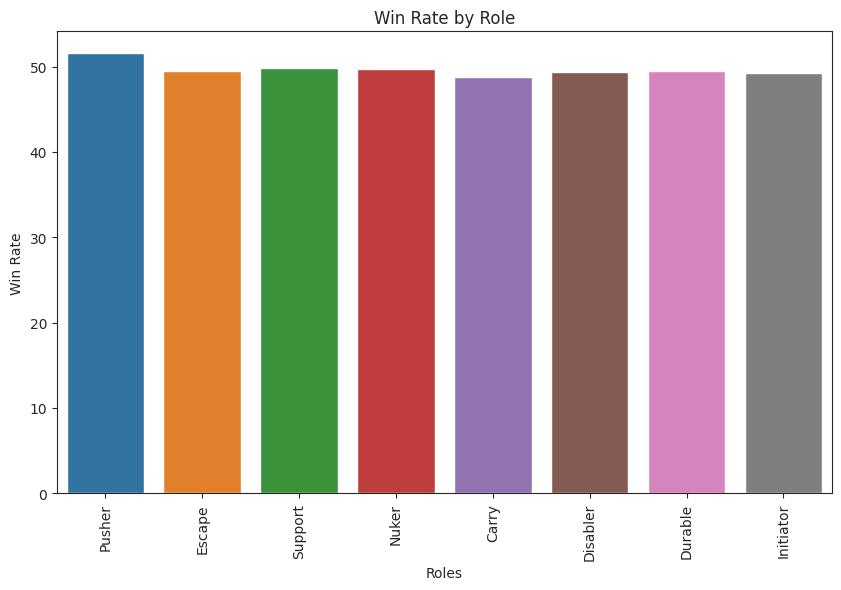

In [18]:
columns_to_plot = ["Unique heroes", "Average Total Pro wins", "Average Times Picked", "Times Banned", "Win Rate"]

for column in columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(x="Roles", y=column, data=roles_stats_pandas)
    plt.title(f"{column} by Role")
    plt.xticks(rotation=90)
    plt.show()

# подготовка

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/Dota2Competitive%20PicksCurrent_Pro_meta.csv', index_col=0)
df.head(3)

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",8,24,61,33.33,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",40,77,73,51.95,False


In [20]:
df.describe()

,Attack Range,Total Pro wins,Times Picked,Times Banned,Win Rate
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,350.604839,91.975806,183.951613,255.112903,49.390726
std,200.271759,73.328691,143.145492,241.567349,6.317535
min,150.000000,4.000000,5.000000,18.000000,32.730000
25%,150.000000,40.750000,82.500000,80.000000,46.217500
50%,340.000000,79.000000,156.000000,185.500000,50.250000
75%,550.000000,106.000000,215.250000,325.000000,52.492500
max,700.000000,407.000000,801.000000,1049.000000,80.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               124 non-null    object 
 1   Primary Attribute  124 non-null    object 
 2   Attack Type        124 non-null    object 
 3   Attack Range       124 non-null    int64  
 4   Roles              124 non-null    object 
 5   Total Pro wins     124 non-null    int64  
 6   Times Picked       124 non-null    int64  
 7   Times Banned       124 non-null    int64  
 8   Win Rate           124 non-null    float64
 9   Niche Hero?        124 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 9.8+ KB


In [22]:
df.columns

Index(['Name', 'Primary Attribute', 'Attack Type', 'Attack Range', 'Roles',
       'Total Pro wins', 'Times Picked', 'Times Banned', 'Win Rate',
       'Niche Hero?'],
      dtype='object')

In [23]:
df[['Name', 'Primary Attribute', 'Attack Type', 'Roles', 'Niche Hero?']].describe()

,Name,Primary Attribute,Attack Type,Roles,Niche Hero?
count,124,124,124,124,124
unique,124,4,2,102,2
top,Abaddon,all,Ranged,"Support, Nuker, Disabler",False
freq,1,32,64,4,104


In [24]:
df['Attack Type'].unique()

array(['Melee', 'Ranged'], dtype=object)

In [25]:
df.columns = ['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles',
       'Totalwins', 'Picked', 'Banned', 'WinRate',
       'Niche']

In [26]:
df

,Name,Attribute,AttackType,AttackRange,Roles,Totalwins,Picked,Banned,WinRate,Niche
0,Abaddon,all,Melee,150,"Support, Carry, Durable",8,24,61,33.33,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",40,77,73,51.95,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",40,66,78,60.61,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",5,14,31,35.71,False
...,...,...,...,...,...,...,...,...,...,...
119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",76,165,432,46.06,False
120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",21,53,225,39.62,False
121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",62,145,71,42.76,False
122,Wraith King,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator",52,99,40,52.53,True


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['AttackType']=le.fit_transform( df['AttackType'] )
df['Niche']=le.fit_transform( df['Niche'] )
df['diverity'] =df['Roles'].str.split().apply(len)



In [28]:
df.corr()

,AttackType,AttackRange,Totalwins,Picked,Banned,WinRate,Niche,diverity
AttackType,1.000000,0.931316,0.018240,0.020272,-0.036235,0.000907,0.073598,-0.336618
AttackRange,0.931316,1.000000,-0.012516,-0.011238,-0.068890,0.029163,0.059130,-0.309602
Totalwins,0.018240,-0.012516,1.000000,0.992885,0.732313,0.199167,-0.041286,0.066193
Picked,0.020272,-0.011238,0.992885,1.000000,0.724217,0.124924,-0.072751,0.064106
Banned,-0.036235,-0.068890,0.732313,0.724217,1.000000,0.087888,-0.324740,0.034765
WinRate,0.000907,0.029163,0.199167,0.124924,0.087888,1.000000,0.253434,0.087963
Niche,0.073598,0.059130,-0.041286,-0.072751,-0.324740,0.253434,1.000000,0.049715
diverity,-0.336618,-0.309602,0.066193,0.064106,0.034765,0.087963,0.049715,1.000000


<Axes: >

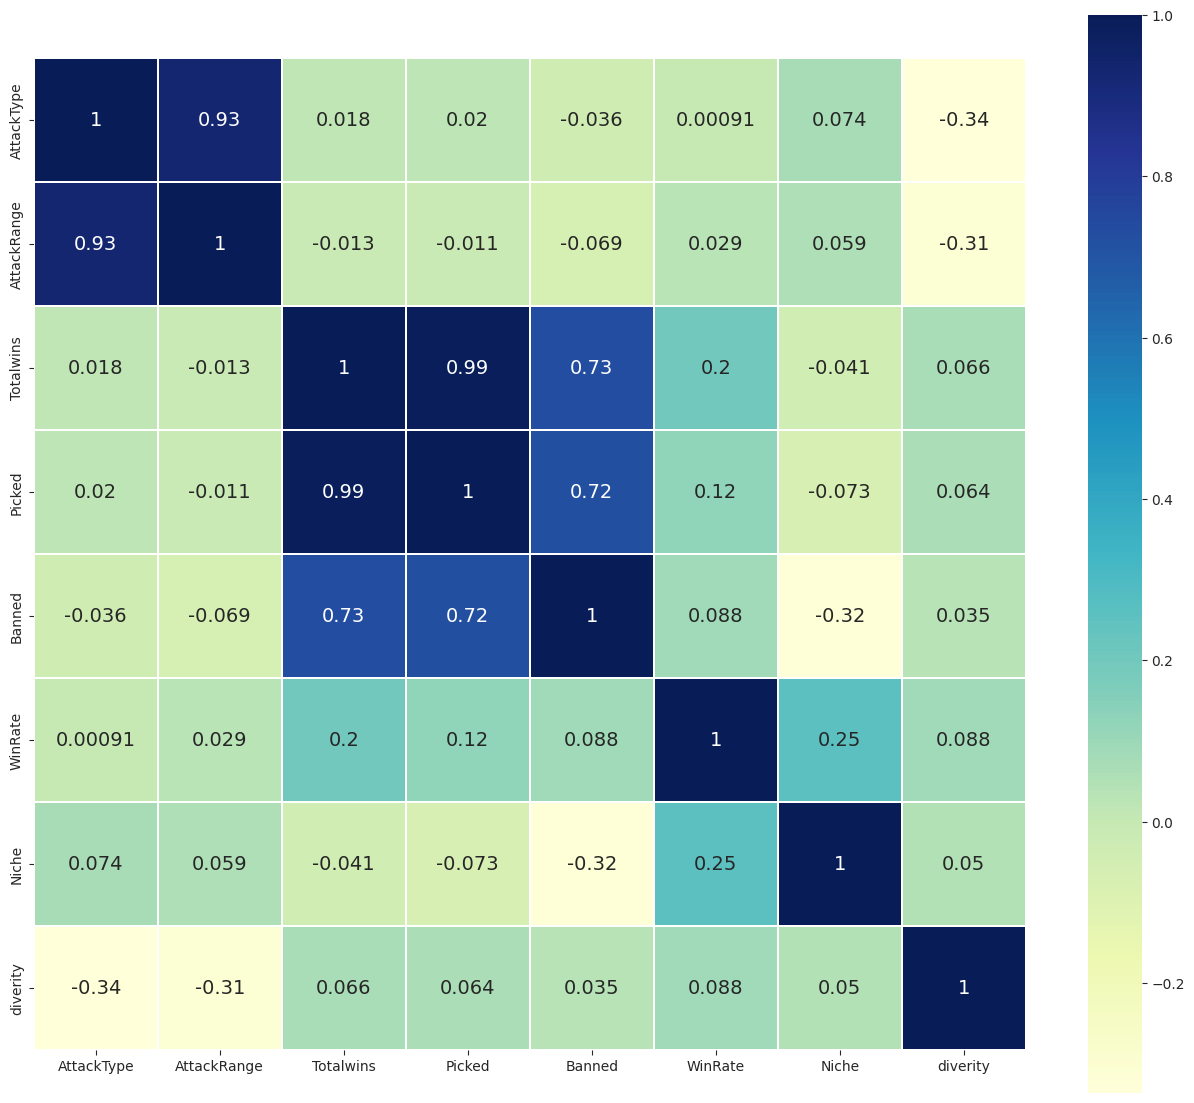

In [29]:
plt.figure(figsize = (16,14))

sns.heatmap(df.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu",
        linewidths=0.2, annot_kws={"size":14})

In [30]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4,
                   figsize=(10,5), params=False):


    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores

    print("****CLASSIFICATION REPORT - TRAINING DATA****")

    print(metrics.classification_report(y_train,y_hat_train, digits=digits))


    print("****CLASSIFICATION REPORT - TEST DATA****")

    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")


    fig, axes = plt.subplots(ncols=2,
                             figsize=figsize)

    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')

    plt.tight_layout()
    plt.show()

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)


def split_scale(df, target, scaler=StandardScaler()):



    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Get list of column names
    cols = X_train.columns

    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4,
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits,
                   figsize=figsize, params=params)

    return model

In [31]:
df.head(3)

,Name,Attribute,AttackType,AttackRange,Roles,Totalwins,Picked,Banned,WinRate,Niche,diverity
0,Abaddon,all,0,150,"Support, Carry, Durable",8,24,61,33.33,0,3
1,Alchemist,str,0,150,"Carry, Support, Durable, Disabler, Initiator, ...",23,55,22,41.82,0,6
2,Ancient Apparition,int,1,675,"Support, Disabler, Nuker",40,77,73,51.95,0,3


In [32]:
df.columns

Index(['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity'],
      dtype='object')

# логрегрессия

In [33]:
df_select = df[['AttackType',  'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity']]

In [76]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'AttackType')


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.6316    0.7059    0.6667        51
           1     0.6875    0.6111    0.6471        54

    accuracy                         0.6571       105
   macro avg     0.6595    0.6585    0.6569       105
weighted avg     0.6603    0.6571    0.6566       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6250    0.5556    0.5882         9
           1     0.6364    0.7000    0.6667        10

    accuracy                         0.6316        19
   macro avg     0.6307    0.6278    0.6275        19
weighted avg     0.6310    0.6316    0.6295        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


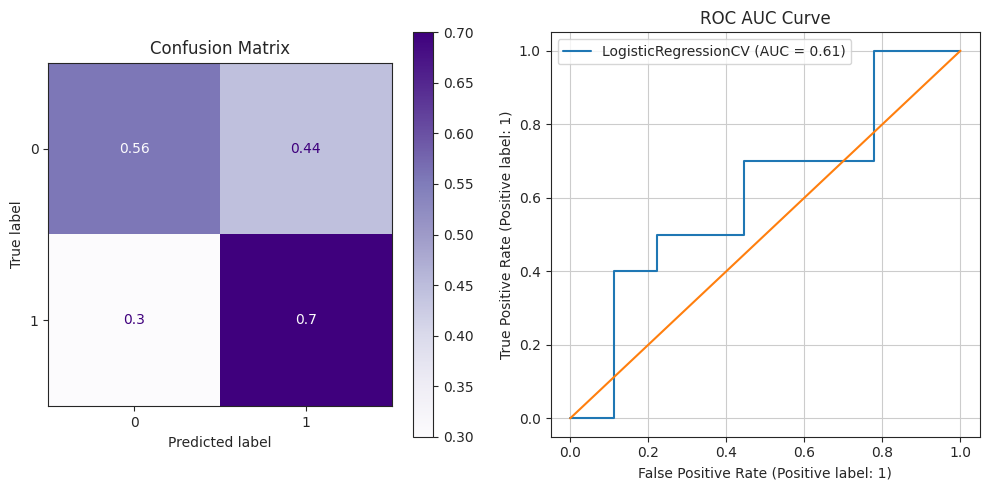

In [35]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [36]:
from statsmodels.formula.api import logit


log_res = logit("AttackType ~  WinRate", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.692626
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:               5.937e-07
Time:                        11:32:31   Log-Likelihood:                -85.886
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                    0.9919
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0503      1.422      0.035      0.972      -2.737       2.837
WinRate        0.0003      0.

In [37]:
log_res = logit("AttackType ~  diverity", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.633370
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.08555
Time:                        11:32:32   Log-Likelihood:                -78.538
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                 0.0001263
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7556      0.777      3.549      0.000       1.234       4.278
diverity      -0.6919      0.

In [38]:
log_res = logit("AttackType ~  Totalwins", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.692460
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:               0.0002404
Time:                        11:32:32   Log-Likelihood:                -85.865
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                    0.8390
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0185      0.289      0.064      0.949      -0.548       0.585
Totalwins      0.0005      0.

In [39]:
log_res = logit("AttackType ~  Totalwins+ WinRate+Picked+Banned+diverity", df_select).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.628134
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             AttackType   No. Observations:                  124
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            5
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.09311
Time:                        11:32:32   Log-Likelihood:                -77.889
converged:                       True   LL-Null:                       -85.886
Covariance Type:            nonrobust   LLR p-value:                  0.006861
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0346      2.108      0.965      0.335      -2.098       6.167
Totalwins     -0.0056      0.

In [40]:
df_d=df.drop(['Name', 'Roles'], axis =1)
df_d = pd.get_dummies(df_d, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
df_d

,AttackRange,AttackType,Banned,Niche,Picked,Totalwins,WinRate,agi,all,diverity,int,str
0,150.0,0.0,61.0,0.0,24.0,8.0,33.33,0.0,1.0,3.0,0.0,0.0
1,150.0,0.0,22.0,0.0,55.0,23.0,41.82,0.0,0.0,6.0,0.0,1.0
2,675.0,1.0,73.0,0.0,77.0,40.0,51.95,0.0,0.0,3.0,1.0,0.0
3,150.0,0.0,78.0,0.0,66.0,40.0,60.61,1.0,0.0,3.0,0.0,0.0
4,625.0,1.0,31.0,0.0,14.0,5.0,35.71,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,600.0,1.0,432.0,0.0,165.0,76.0,46.06,0.0,1.0,5.0,0.0,0.0
120,425.0,1.0,225.0,0.0,53.0,21.0,39.62,0.0,1.0,3.0,0.0,0.0
121,550.0,1.0,71.0,0.0,145.0,62.0,42.76,0.0,0.0,3.0,1.0,0.0
122,150.0,0.0,40.0,1.0,99.0,52.0,52.53,0.0,0.0,5.0,0.0,1.0


In [41]:
df_d.columns

Index(['AttackRange', 'AttackType', 'Banned', 'Niche', 'Picked', 'Totalwins',
       'WinRate', 'agi', 'all', 'diverity', 'int', 'str'],
      dtype='object')

In [42]:
log_res = logit("str ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.305629
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    str   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4565
Time:                        11:32:32   Log-Likelihood:                -37.898
converged:                       True   LL-Null:                       -69.730
Covariance Type:            nonrobust   LLR p-value:                 2.790e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7348      3.230      0.847      0.397      -3.596       9.066
AttackRange    -0.0075    

In [43]:
log_res = logit("int ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

         Current function value: 0.301288
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    int   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4555
Time:                        11:32:33   Log-Likelihood:                -37.360
converged:                      False   LL-Null:                       -68.609
Covariance Type:            nonrobust   LLR p-value:                 4.775e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -17.0944    614.822     -0.028      0.978   -1222.124    1187.935
AttackRange     0.0071      0.003      2.175      0.030       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
log_res = logit("agi ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.512147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    agi   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.08925
Time:                        11:32:33   Log-Likelihood:                -63.506
converged:                       True   LL-Null:                       -69.730
Covariance Type:            nonrobust   LLR p-value:                   0.08680
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.3061      2.496     -1.324      0.185      -8.199       1.587
AttackRange    -0.0060    

In [45]:
log_res = logit("all ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.521759
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    all   No. Observations:                  124
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.08627
Time:                        11:32:33   Log-Likelihood:                -64.698
converged:                       True   LL-Null:                       -70.807
Covariance Type:            nonrobust   LLR p-value:                   0.09364
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5410      2.239      0.242      0.809      -3.848       4.930
AttackRange    -0.0005    

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.5962    0.6078    0.6019        51
           1     0.6226    0.6111    0.6168        54

    accuracy                         0.6095       105
   macro avg     0.6094    0.6095    0.6094       105
weighted avg     0.6098    0.6095    0.6096       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6250    0.5556    0.5882         9
           1     0.6364    0.7000    0.6667        10

    accuracy                         0.6316        19
   macro avg     0.6307    0.6278    0.6275        19
weighted avg     0.6310    0.6316    0.6295        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


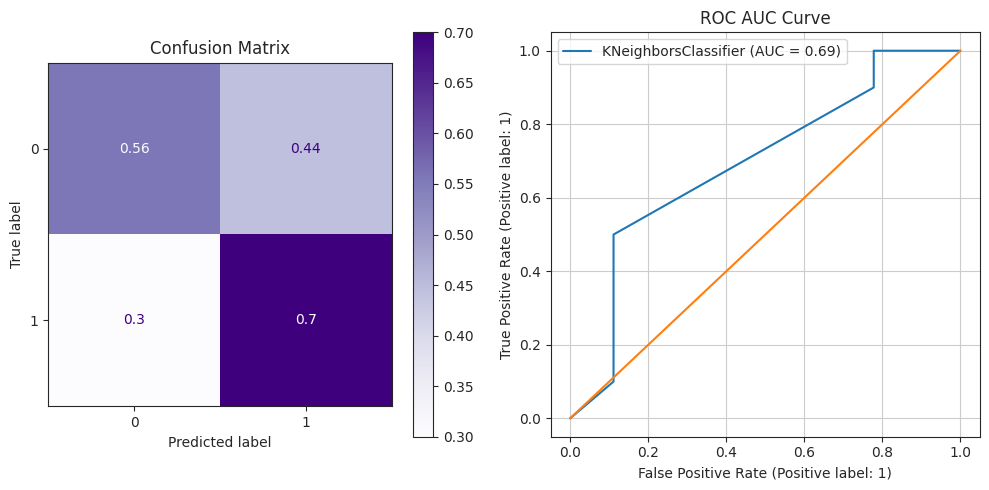

KNeighborsClassifier(n_neighbors=25)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
fit_eval(KNeighborsClassifier(n_neighbors=25), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBRFClassifier, XGBClassifier

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        51
           1     1.0000    1.0000    1.0000        54

    accuracy                         1.0000       105
   macro avg     1.0000    1.0000    1.0000       105
weighted avg     1.0000    1.0000    1.0000       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5556    0.5556    0.5556         9
           1     0.6000    0.6000    0.6000        10

    accuracy                         0.5789        19
   macro avg     0.5778    0.5778    0.5778        19
weighted avg     0.5789    0.5789    0.5789        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


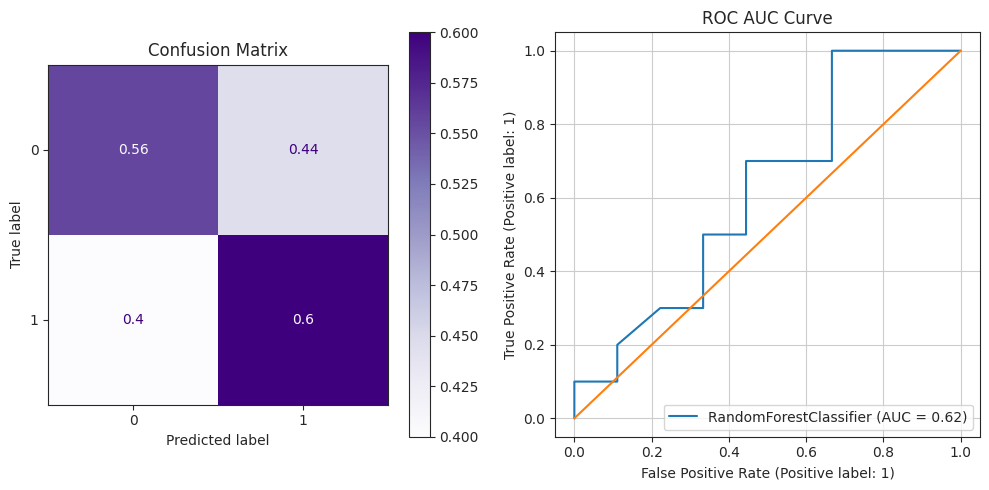

RandomForestClassifier(random_state=42)

In [48]:
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.9020    0.9020    0.9020        51
           1     0.9074    0.9074    0.9074        54

    accuracy                         0.9048       105
   macro avg     0.9047    0.9047    0.9047       105
weighted avg     0.9048    0.9048    0.9048       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5556    0.5556    0.5556         9
           1     0.6000    0.6000    0.6000        10

    accuracy                         0.5789        19
   macro avg     0.5778    0.5778    0.5778        19
weighted avg     0.5789    0.5789    0.5789        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


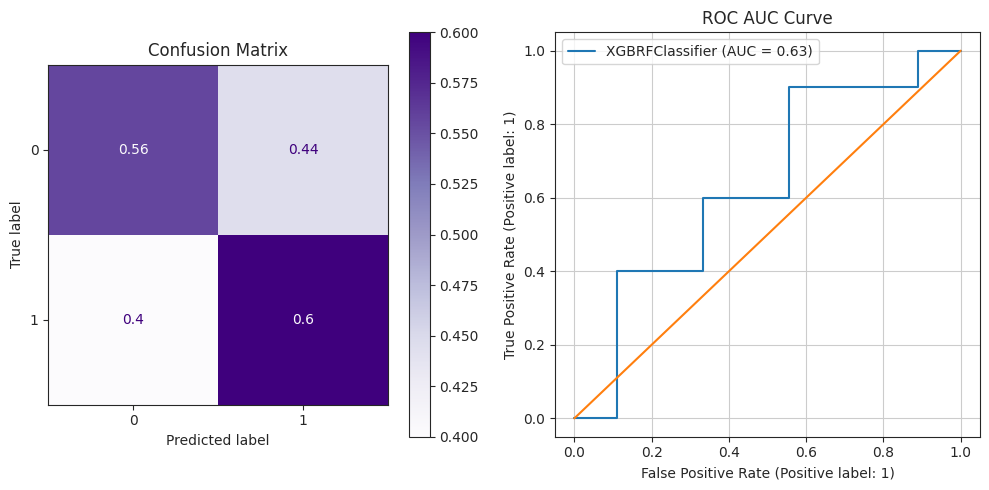

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=None, ...)

In [77]:
fit_eval(XGBRFClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        51
           1     1.0000    1.0000    1.0000        54

    accuracy                         1.0000       105
   macro avg     1.0000    1.0000    1.0000       105
weighted avg     1.0000    1.0000    1.0000       105

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.4286    0.6667    0.5217         9
           1     0.4000    0.2000    0.2667        10

    accuracy                         0.4211        19
   macro avg     0.4143    0.4333    0.3942        19
weighted avg     0.4135    0.4211    0.3875        19

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


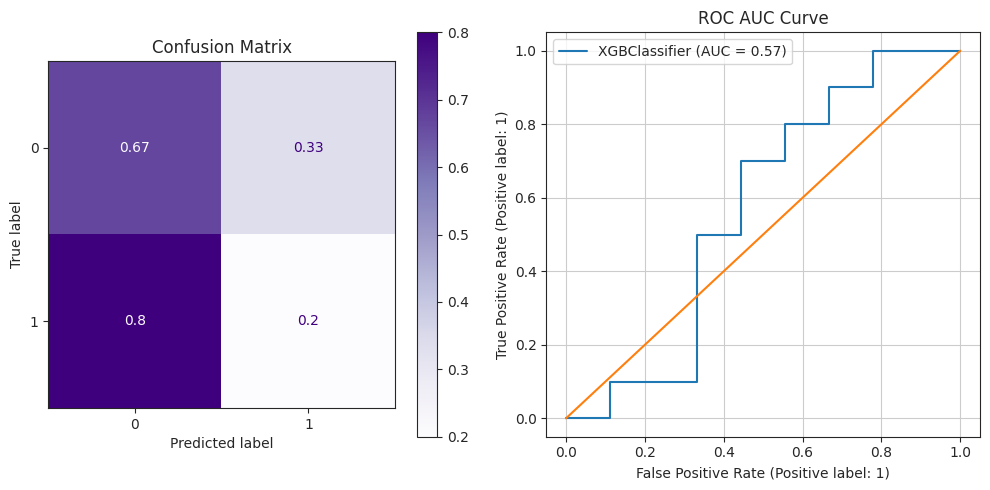

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [78]:
fit_eval(XGBClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

# мульти класс

In [49]:
df.columns

Index(['Name', 'Attribute', 'AttackType', 'AttackRange', 'Roles', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity'],
      dtype='object')

In [50]:
df_mul =df[['Attribute', 'AttackType', 'AttackRange', 'Totalwins',
       'Picked', 'Banned', 'WinRate', 'Niche', 'diverity']]
df_mul

,Attribute,AttackType,AttackRange,Totalwins,Picked,Banned,WinRate,Niche,diverity
0,all,0,150,8,24,61,33.33,0,3
1,str,0,150,23,55,22,41.82,0,6
2,int,1,675,40,77,73,51.95,0,3
3,agi,0,150,40,66,78,60.61,0,3
4,agi,1,625,5,14,31,35.71,0,3
...,...,...,...,...,...,...,...,...,...
119,all,1,600,76,165,432,46.06,0,5
120,all,1,425,21,53,225,39.62,0,3
121,int,1,550,62,145,71,42.76,0,3
122,str,0,150,52,99,40,52.53,1,5


In [51]:
# Create training and test data splits.
X_train, X_test, y_train, \
                y_test = split_scale(df_mul, 'Attribute')


https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/?ref=lbp

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# accuracy on X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

0.42105263157894735


In [53]:
cm

array([[1, 0, 1, 4],
       [0, 1, 0, 3],
       [0, 3, 3, 0],
       [0, 0, 0, 3]])

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

         agi       1.00      0.17      0.29         6
         all       0.25      0.25      0.25         4
         int       0.75      0.50      0.60         6
         str       0.30      1.00      0.46         3

    accuracy                           0.42        19
   macro avg       0.57      0.48      0.40        19
weighted avg       0.65      0.42      0.41        19



In [54]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

0.631578947368421


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

         agi       0.67      0.33      0.44         6
         all       0.67      0.50      0.57         4
         int       0.86      1.00      0.92         6
         str       0.33      0.67      0.44         3

    accuracy                           0.63        19
   macro avg       0.63      0.62      0.60        19
weighted avg       0.67      0.63      0.62        19



In [55]:
cm

array([[2, 1, 1, 2],
       [0, 2, 0, 2],
       [0, 0, 6, 0],
       [1, 0, 0, 2]])

In [74]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

0.631578947368421


In [87]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

         agi       0.50      0.50      0.50         6
         all       0.50      0.50      0.50         4
         int       1.00      0.83      0.91         6
         str       0.50      0.67      0.57         3

    accuracy                           0.63        19
   macro avg       0.62      0.62      0.62        19
weighted avg       0.66      0.63      0.64        19



In [75]:
cm

array([[3, 2, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 5, 0],
       [1, 0, 0, 2]])

In [57]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.47368421052631576


In [88]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

         agi       0.00      0.00      0.00         6
         all       0.00      0.00      0.00         4
         int       0.60      1.00      0.75         6
         str       0.33      1.00      0.50         3

    accuracy                           0.47        19
   macro avg       0.23      0.50      0.31        19
weighted avg       0.24      0.47      0.32        19



In [58]:
cm

array([[0, 0, 3, 3],
       [0, 0, 1, 3],
       [0, 0, 6, 0],
       [0, 0, 0, 3]])

In [94]:
log_res = logit("int ~  Totalwins+WinRate", df_d).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.547633
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    int   No. Observations:                  124
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.01024
Time:                        13:07:05   Log-Likelihood:                -67.906
converged:                       True   LL-Null:                       -68.609
Covariance Type:            nonrobust   LLR p-value:                    0.4952
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5125      1.743     -0.868      0.386      -4.929       1.904
Totalwins      0.0032      0.

# лин регресс

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
lin_res = ols("AttackRange ~ Totalwins+ WinRate+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:            AttackRange   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.883
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0171
Time:                        11:32:38   Log-Likelihood:                -825.46
No. Observations:                 124   AIC:                             1663.
Df Residuals:                     118   BIC:                             1680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    449.7419    187.179      2.403      0.0

In [61]:
lin_res = ols("WinRate ~ Totalwins+AttackRange+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     17.94
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.33e-13
Time:                        11:32:39   Log-Likelihood:                -368.96
No. Observations:                 124   AIC:                             749.9
Df Residuals:                     118   BIC:                             766.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.8101      2.178     21.496      

In [62]:
lin_res = ols("WinRate ~ AttackRange+Picked+Banned+diverity", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7762
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.543
Time:                        11:32:39   Log-Likelihood:                -402.42
No. Observations:                 124   AIC:                             814.8
Df Residuals:                     119   BIC:                             828.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.4631      2.834     16.043      

In [63]:
lin_res = ols("WinRate ~ Totalwins", df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.039
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0266
Time:                        11:32:39   Log-Likelihood:                -401.51
No. Observations:                 124   AIC:                             807.0
Df Residuals:                     122   BIC:                             812.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.8125      0.898     53.260      0.0

In [64]:
lin_res = ols("str ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    str   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.39
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.50e-10
Time:                        11:32:39   Log-Likelihood:                -41.986
No. Observations:                 124   AIC:                             99.97
Df Residuals:                     116   BIC:                             122.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7925      0.334      2.376      

In [65]:
lin_res = ols("int ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    int   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     11.24
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.33e-11
Time:                        11:32:39   Log-Likelihood:                -38.691
No. Observations:                 124   AIC:                             93.38
Df Residuals:                     116   BIC:                             115.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2178      0.325     -0.670      

In [66]:
lin_res = ols("agi ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    agi   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.679
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.121
Time:                        11:32:39   Log-Likelihood:                -66.177
No. Observations:                 124   AIC:                             148.4
Df Residuals:                     116   BIC:                             170.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1637      0.405     -0.404      

In [67]:
lin_res = ols("all ~  AttackRange+AttackType+Banned+Niche+Picked+Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.736
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.107
Time:                        11:32:39   Log-Likelihood:                -67.284
No. Observations:                 124   AIC:                             150.6
Df Residuals:                     116   BIC:                             173.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5890      0.409      1.440      

In [91]:
lin_res = ols("int ~  Totalwins+WinRate", df_d).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    int   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7311
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.483
Time:                        13:04:29   Log-Likelihood:                -70.047
No. Observations:                 124   AIC:                             146.1
Df Residuals:                     121   BIC:                             154.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1771      0.306      0.578      0.5